# Preprocessing


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dog_adoption2')
df.shape

(23298, 58)

Dropping Transfered dogs to capture how long it take for a dog to get adopted. Transfers are likely based on how busy the shelter is and not dependent on a dog's characteristics. 

In [3]:
df = df[df['outcome_type']=='Adoption']
df.head()

,Unnamed: 0,outcome_type,age_upon_outcome_(years),outcome_datetime,outcome_monthyear,animal_type,intake_condition,intake_type,sex_upon_outcome,age_upon_intake_(years),...,color_Brown,color_Brown Brindle,color_Buff,color_Gray,color_Red,color_Sable,color_Tan,color_Tricolor,color_White,color_Yellow
1,12,Adoption,16,2013-11-22 09:44:00,2013-11,Dog,Normal,Owner Surrender,Neutered Male,16,...,0,0,0,0,0,0,0,0,0,0
2,14,Adoption,17,2016-10-07 12:34:00,2016-10,Dog,Aged,Public Assist,Neutered Male,17,...,0,0,0,0,0,0,1,0,0,0
3,22,Adoption,15,2015-10-29 15:00:00,2015-10,Dog,Normal,Stray,Neutered Male,15,...,0,0,0,0,0,1,0,0,0,0
6,32,Adoption,15,2016-11-15 10:37:00,2016-11,Dog,Normal,Stray,Spayed Female,15,...,0,0,0,0,0,0,0,0,0,0
7,48,Adoption,11,2013-11-16 12:24:00,2013-11,Dog,Normal,Stray,Spayed Female,11,...,0,0,0,0,0,0,0,1,0,0


In [4]:
#don't need the int columns anymore
df = df.drop(['intake_cond_int','intake_type_int'], axis=1)

In [5]:
#intake condition and type might add a little noise since it's not equally distributed 
print(df['intake_condition'].value_counts())
print(df['intake_type'].value_counts())

Normal      14969
Injured       457
Nursing       197
Sick          182
Aged           44
Other          26
Pregnant       13
Feral           2
Name: intake_condition, dtype: int64
Stray                 11657
Owner Surrender        3912
Public Assist           317
Euthanasia Request        4
Name: intake_type, dtype: int64


In [6]:
#creating dummy variables for the remaining categorical variables
df = pd.get_dummies(df, columns=['intake_condition', 'intake_type', 'sex_upon_outcome'], prefix=['intake_cond', 'intake_type', 'gender'])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c1f9fac70>]],
      dtype=object)

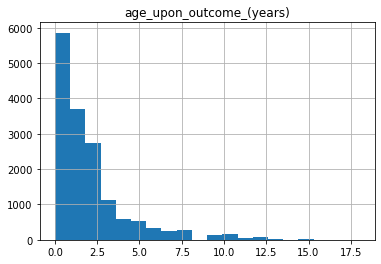

In [7]:

df[['age_upon_outcome_(years)']].hist(bins=20)


In [8]:
df['age_upon_outcome_(years)'].unique()

array([16, 17, 15, 11, 12, 13,  9, 10,  7,  8, 14,  6,  5,  4,  3,  2,  1,
        0, 18])

In [9]:
#changing time_in_shelter_days to int
df['time_in_shelter_days'] = df['time_in_shelter_days'].astype(int)

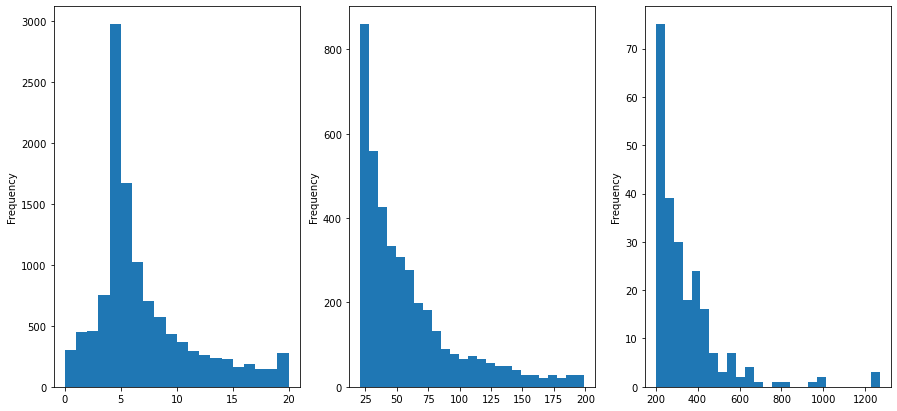

In [10]:
# histograms of time in shleter
time_most = df[df.loc[:,'time_in_shelter_days'] >=200 ]
time20 = df[df.loc[:,'time_in_shelter_days']<= 20 ]
time_mid = df[(df.loc[:, 'time_in_shelter_days']> 20) & (df.loc[:, 'time_in_shelter_days']<200)]


fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (15,7))
time20['time_in_shelter_days'].plot(ax=axes[0], kind='hist', bins=20)
time_mid['time_in_shelter_days'].plot(ax=axes[1], kind='hist', bins=25)
time_most['time_in_shelter_days'].plot(ax=axes[2], kind='hist', bins=25)


In [11]:
#most dogs spend less than a week in the shelter
print('Percentiles of time in shelter. \n 10th:{}, 50th: {}, 90th: {}'.format(df['time_in_shelter_days'].quantile(q=.10),
        df['time_in_shelter_days'].quantile(q=.50), df['time_in_shelter_days'].quantile(q=.90)))

Percentiles of time in shelter. 
 10th:3.0, 50th: 7.0, 90th: 61.0


In [12]:
#creating bins based on quantiles
labels = ['< 4 days', '4-5 days', '5-10 days', '10-31 days', '31-1268 days']
df['time_in_shelter_binned'] = pd.qcut(df['time_in_shelter_days'], 5, labels=labels)

In [13]:
df['time_in_shelter_binned'].value_counts().sort_values()

4-5 days        1666
10-31 days      3048
5-10 days       3098
31-1268 days    3154
< 4 days        4924
Name: time_in_shelter_binned, dtype: int64

In [14]:
#convert binned time in shelter to int (0-4) for modeling purposes
def create_dict(items): #creates dict {bin:num}
        return {v: i for i, v in enumerate(items, 0)}
time_binned_int = df['time_in_shelter_binned'].unique().tolist()
time = create_dict(time_binned_int)
df['time_binned_int']=df['time_in_shelter_binned'].map(create_dict(time))
df.head()

,Unnamed: 0,outcome_type,age_upon_outcome_(years),outcome_datetime,outcome_monthyear,animal_type,age_upon_intake_(years),intake_datetime,intake_monthyear,time_in_shelter_days,...,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,gender_Intact Female,gender_Intact Male,gender_Neutered Male,gender_Spayed Female,time_in_shelter_binned,time_binned_int
1,12,Adoption,16,2013-11-22 09:44:00,2013-11,Dog,16,2013-10-03 15:47:00,2013-10,49,...,0,1,0,0,0,0,1,0,31-1268 days,0
2,14,Adoption,17,2016-10-07 12:34:00,2016-10,Dog,17,2016-09-28 12:05:00,2016-09,9,...,0,0,1,0,0,0,1,0,5-10 days,1
3,22,Adoption,15,2015-10-29 15:00:00,2015-10,Dog,15,2015-10-06 12:29:00,2015-10,23,...,0,0,0,1,0,0,1,0,10-31 days,2
6,32,Adoption,15,2016-11-15 10:37:00,2016-11,Dog,15,2016-08-17 14:05:00,2016-08,89,...,0,0,0,1,0,0,0,1,31-1268 days,0
7,48,Adoption,11,2013-11-16 12:24:00,2013-11,Dog,11,2013-11-13 18:16:00,2013-11,2,...,0,0,0,1,0,0,0,1,< 4 days,3


In [15]:
#columns to be used as x, y will only be time_in_shelter_binned
l = list(df.columns)
c = df.columns[df.columns.str.startswith(('breed', 'color', 'gender', 'intake_type_', 'intake_cond_'))].to_list()
columns=['age_upon_outcome_(years)']+ c 
columns
x_df = df[columns]

In [16]:
x = x_df
y = df[['time_in_shelter_binned']]
x.head()

,age_upon_outcome_(years),breed_Anatol Shepherd,breed_Australian Cattle Dog,breed_Australian Kelpie,breed_Australian Shepherd,breed_Beagle,breed_Border Collie,breed_Boxer,breed_Cairn Terrier,breed_Catahoula,...,intake_cond_Pregnant,intake_cond_Sick,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,gender_Intact Female,gender_Intact Male,gender_Neutered Male,gender_Spayed Female
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
6,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
7,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


Split into train and test data

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =.3, random_state=42)

# Modeling
 KNN and Random Forest

In [18]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

train_scores = []
test_scores = []

for i in range(1, 10):
    knn = KNeighborsClassifier(i)
    knn.fit(x_train, y_train)
    
    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test, y_test))

In [19]:
print('train:',[round(x, 4) for x in train_scores])
print('test:',[round(x, 4) for x in test_scores])


train: [0.5296, 0.4484, 0.4652, 0.4703, 0.4717, 0.4667, 0.4602, 0.4572, 0.4617]
test: [0.3082, 0.278, 0.3109, 0.3256, 0.3266, 0.3327, 0.3382, 0.3455, 0.3493]


In [20]:
#Random Forest gini
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
clf = RandomForestClassifier(criterion='gini' ,random_state=1)

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

metrics.accuracy_score(y_test, y_pred)




0.3771764212292847

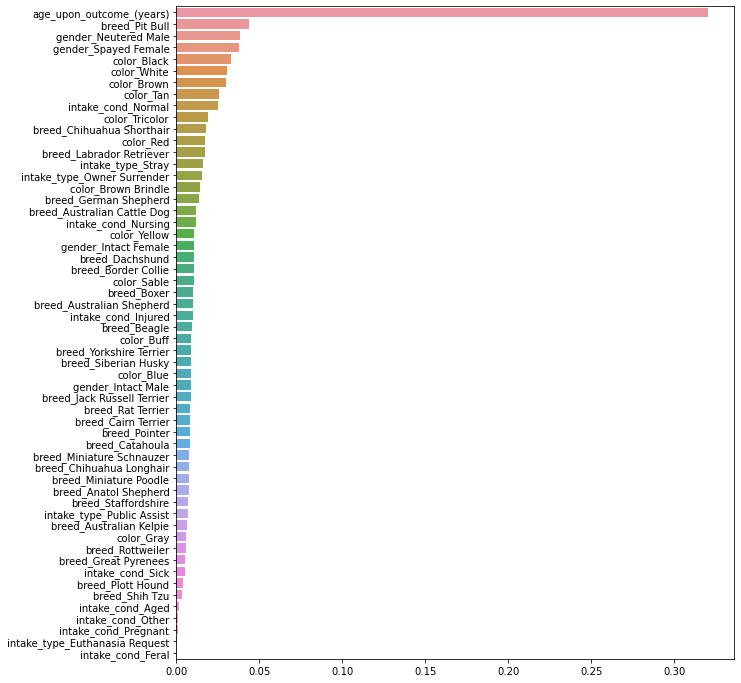

In [21]:
feature_imp = clf.feature_importances_
f = pd.Series(feature_imp,index=x_df.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 12))
sns.barplot(x=f, y=f.index)

Looks like age is the most important factor, gender is likely so high up because the majority of dogs are spayed femals and neutered males. Intake condition may be adding noise. 

In [22]:
#Random Forest entropy
e_clf = RandomForestClassifier(criterion='entropy', random_state=1)
e_clf = e_clf.fit(x_train, y_train)

y_pred = e_clf.predict(x_test)
metrics.accuracy_score(y_test, y_pred)


0.3826305852737571

In [60]:
#rerunning random forest without certain varables 
#creating new train and test sets
#remving color improves the model the most
c = df.columns[df.columns.str.startswith(( 'breed','gender', 'intake_cond_', 'intake_type_'))].to_list()
columns=['age_upon_outcome_(years)']+ c 
columns
x2_df = df[columns]

x2 = x2_df
y2 = df[['time_in_shelter_binned']]


x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size =.3, random_state=42)

In [61]:
e_clf2 = RandomForestClassifier(criterion='entropy', random_state=1)
e_clf2 = e_clf2.fit(x2_train, y2_train)

y2_pred = e_clf2.predict(x2_test)
metrics.accuracy_score(y2_test, y2_pred)


0.4052863436123348

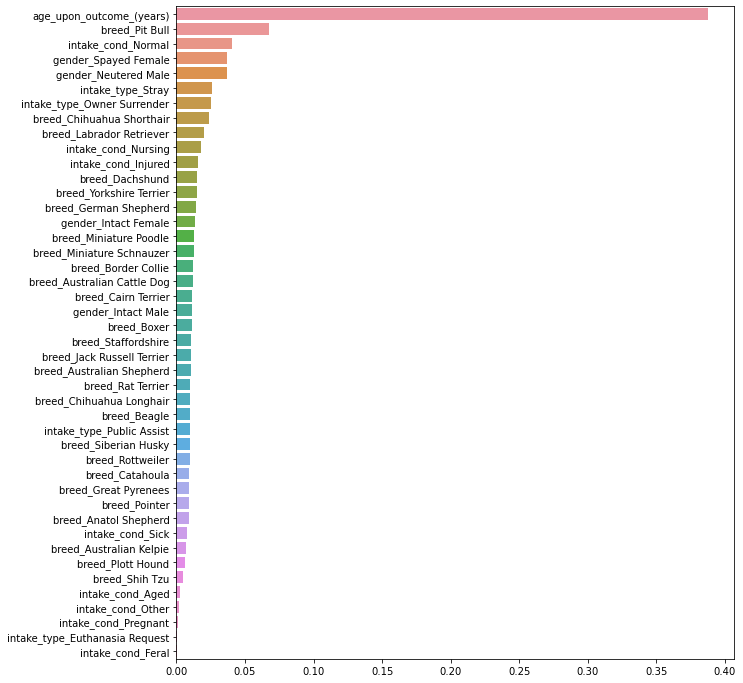

In [57]:
feature_imp = e_clf2.feature_importances_
f2 = pd.Series(feature_imp,index=x2_df.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 12))
sns.barplot(x=f2, y=f2.index)